<a href="https://colab.research.google.com/github/fabianhuertas1992/An-lisis-Img-Sentinel/blob/main/Colombia_Json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de Departamentos de Colombia a partir de un GeoJSON


In [ ]:
# @title Montar acceso Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# @title Importacion de Librerias Requeridas

import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# @title Ruta de archivo Json de Colombia

# Ruta al archivo GeoJSON
ruta_geojson = '/content/drive/MyDrive/Mapa_Colombia_Json/colombia_departamentos.geojson'

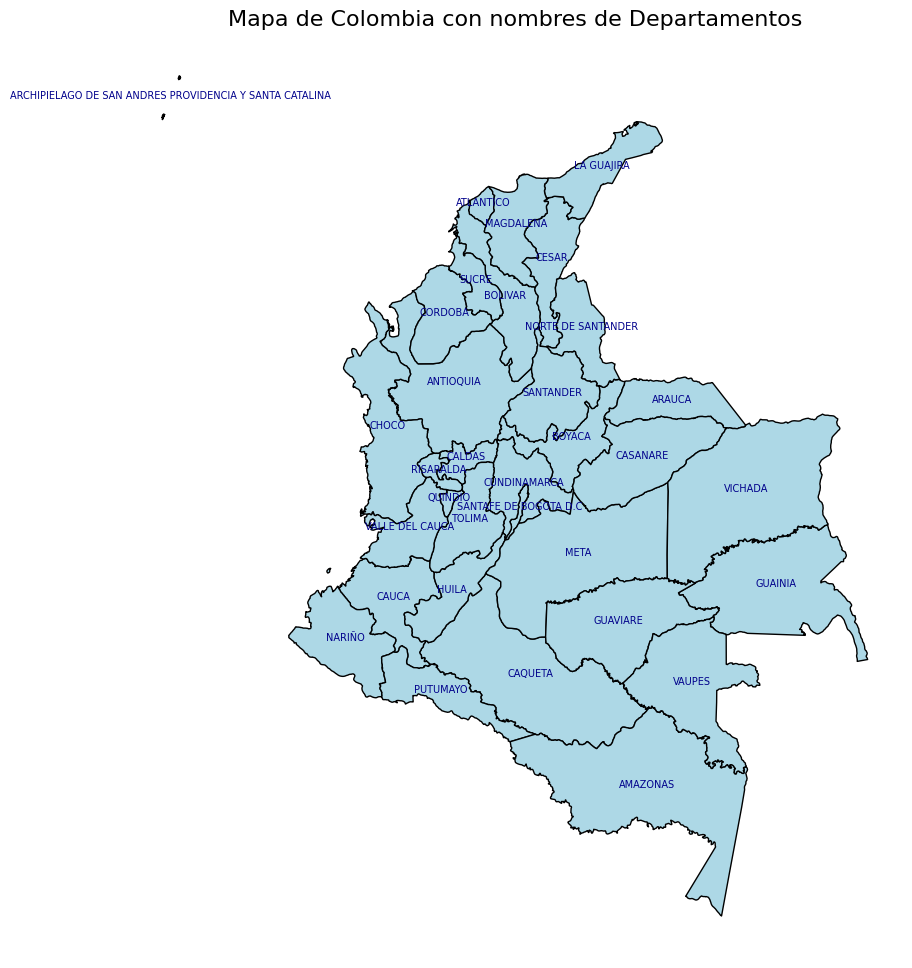

In [ ]:
# @title Lectura del archivo Json y visualización en el mapa

# Leer el archivo
departamentos = gpd.read_file(ruta_geojson)

# Graficar el mapa
fig, ax = plt.subplots(figsize=(12, 12))
departamentos.plot(ax=ax, color='lightblue', edgecolor='black')

# Agregar nombre de los departamentos
for idx, row in departamentos.iterrows():
    if row.geometry.centroid.is_valid:  # A veces puede fallar si hay geometrías malas
        centroid = row.geometry.centroid
        nombre = row.get('NOMBRE_DPT', 'Sin Nombre')  # Usamos el campo 'NOMBRE_DPT'
        ax.text(centroid.x, centroid.y, nombre, fontsize=7, ha='center', color='darkblue')

# Ajustes finales
ax.set_title("Mapa de Colombia con nombres de Departamentos", fontsize=16)
ax.axis('off')

plt.show()
